##     Heart Disease Predictor        


This project aims to predict the occurrence of heart disease using different
classification algorithms.

#Import Data
#Data Exploration



In [ ]:
#needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import scipy.stats as st

In [ ]:
#import dataset
dataset=pd.read_csv('heart.csv')

In [ ]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Feature Information

In [ ]:
dataset.describe() #statistical information about features

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#display the unique values for the features
dataset.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
#age: age in years(numerical)
#sex:M or F (categorical)
#ChestPainType: 0,1,2,3 (categorical)
#RestingBP: resting blood pressure (Numerical)
#Cholesterol:serum cholestoral in mg/dl(Numerical)
#FastingBS:Fasting Blood Sugar(Numerical)
#RestingECG: resting electrocardiographic results(Categorical): 'Normal', 'ST', 'LVH'
#MaxHR: maximum heart rate achieved(Numerical)
#ExerciseAngina: exercise induced angina (Categorical)1 = yes; 0 = no
#Oldpeak:ST depression induced by exercise relative to rest(Numerical)
#ST_Slope: the slope of the peak exercise ST segment(Categorical): 'Up', 'Flat', 'Down'
#HeartDisease:Target variable (Categorical): 0: not occur , 1: occur

#Sex,ChestPainType,RestingECG,ExerciseAngina, #ST_Slope,FastingBS: one hot encoder(if categories are not described in discrete)
#HeartDisease: Target ==> LabelEncoder(), if categories are not discrete

In [ ]:
#Check for missed values
dataset.isnull().sum()
#Fortunately, There is no missing values.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#check for duplicated records
dataset.duplicated().any()
#or we can use this
dataset.duplicated().where(dataset.duplicated() != False).count()
#no duplicated records

0

# Descriptive Stastics

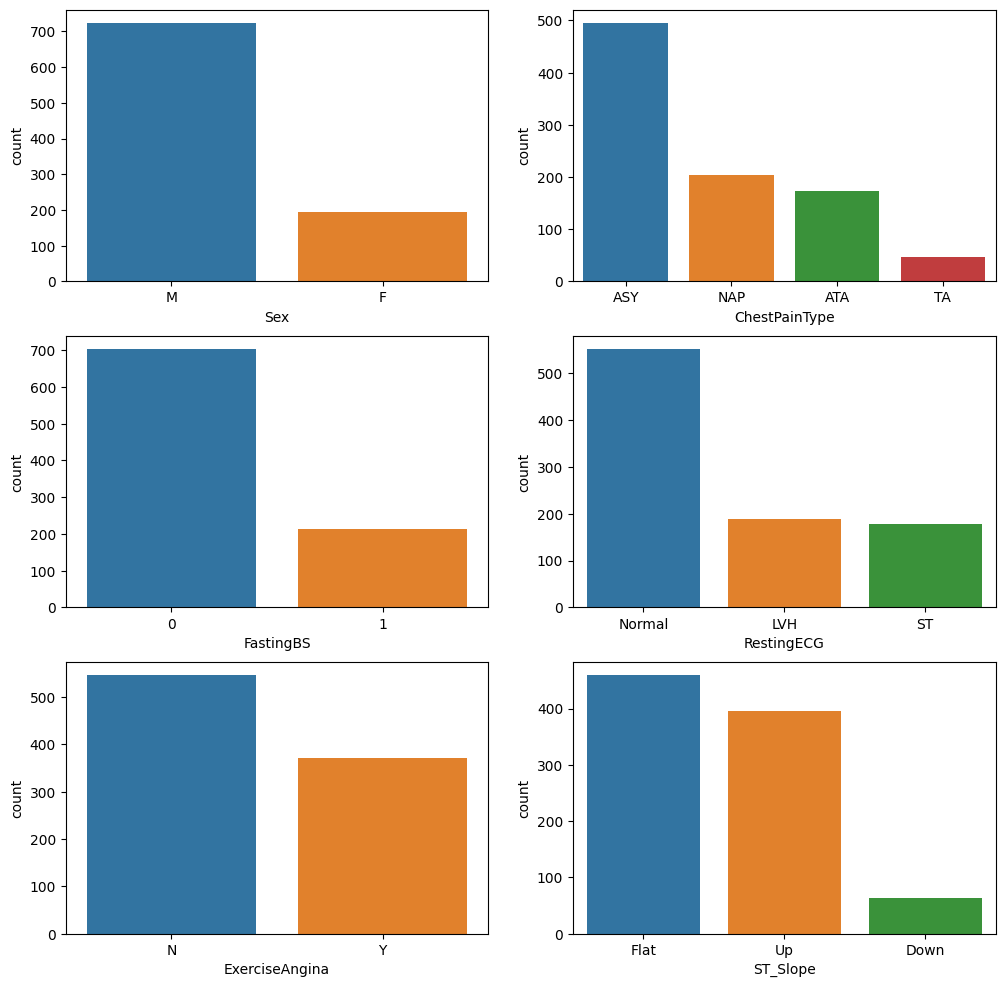

In [ ]:
CaFeatures=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina', 'ST_Slope']
fig, axss = plt.subplots(3, 2, figsize=[12, 12])
idx = 0

for var in CaFeatures:
    ax = axss[idx // 2, idx % 2]  # Access the individual axes object
    sns.countplot(x=var, data=dataset, order=dataset[var].value_counts().index, ax=ax)
    idx += 1
plt.show()
#the patient data is almost distributed for all categories of the independent features.. we can say that there
#is no outliers in categorical data

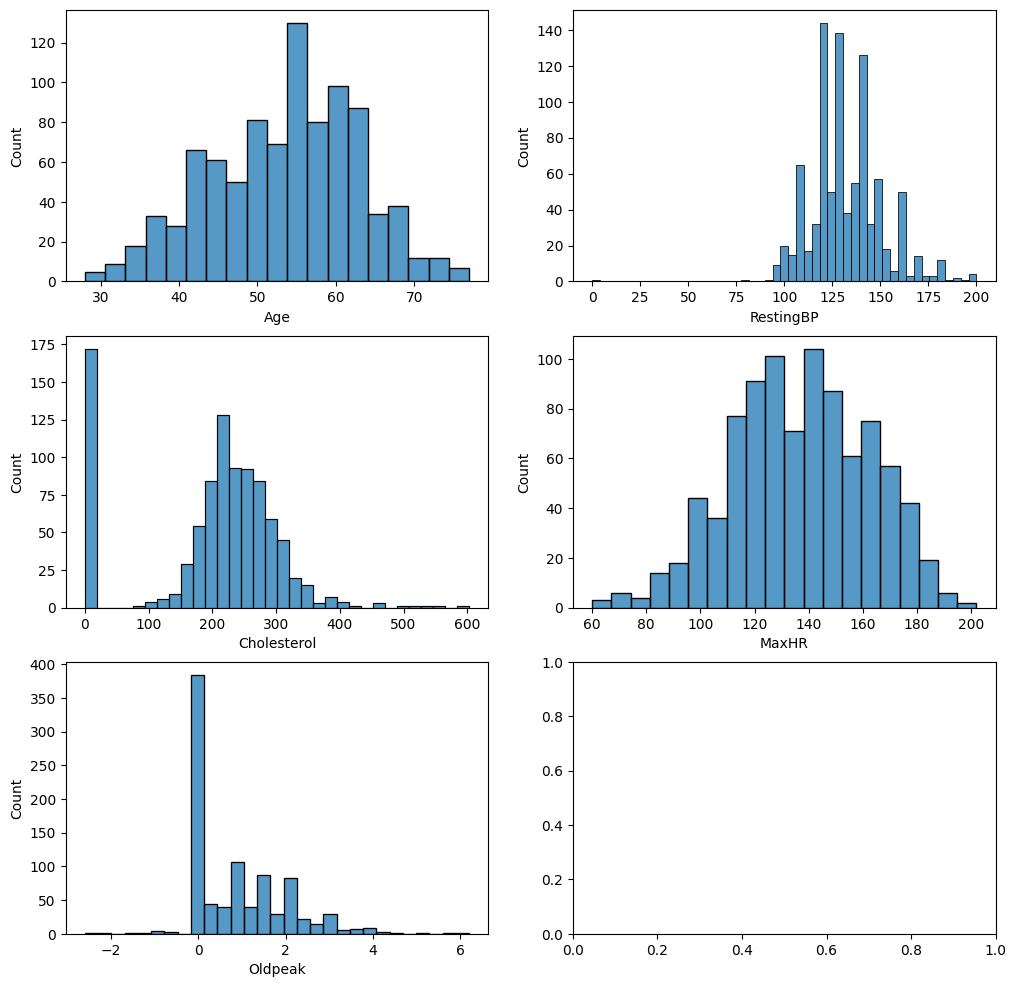

In [ ]:
num_var = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axss = plt.subplots(3, 2, figsize=[12, 12])  # set canvas
idx = 0
for var in num_var:
    ax = axss.flatten()[idx]  # Access the individual axes object
    sns.histplot(data=dataset, x=dataset[var], ax=ax)
    idx += 1
plt.show()
#see the distribution for each numeric feature

<ipython-input-67-0d91d3a90063>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


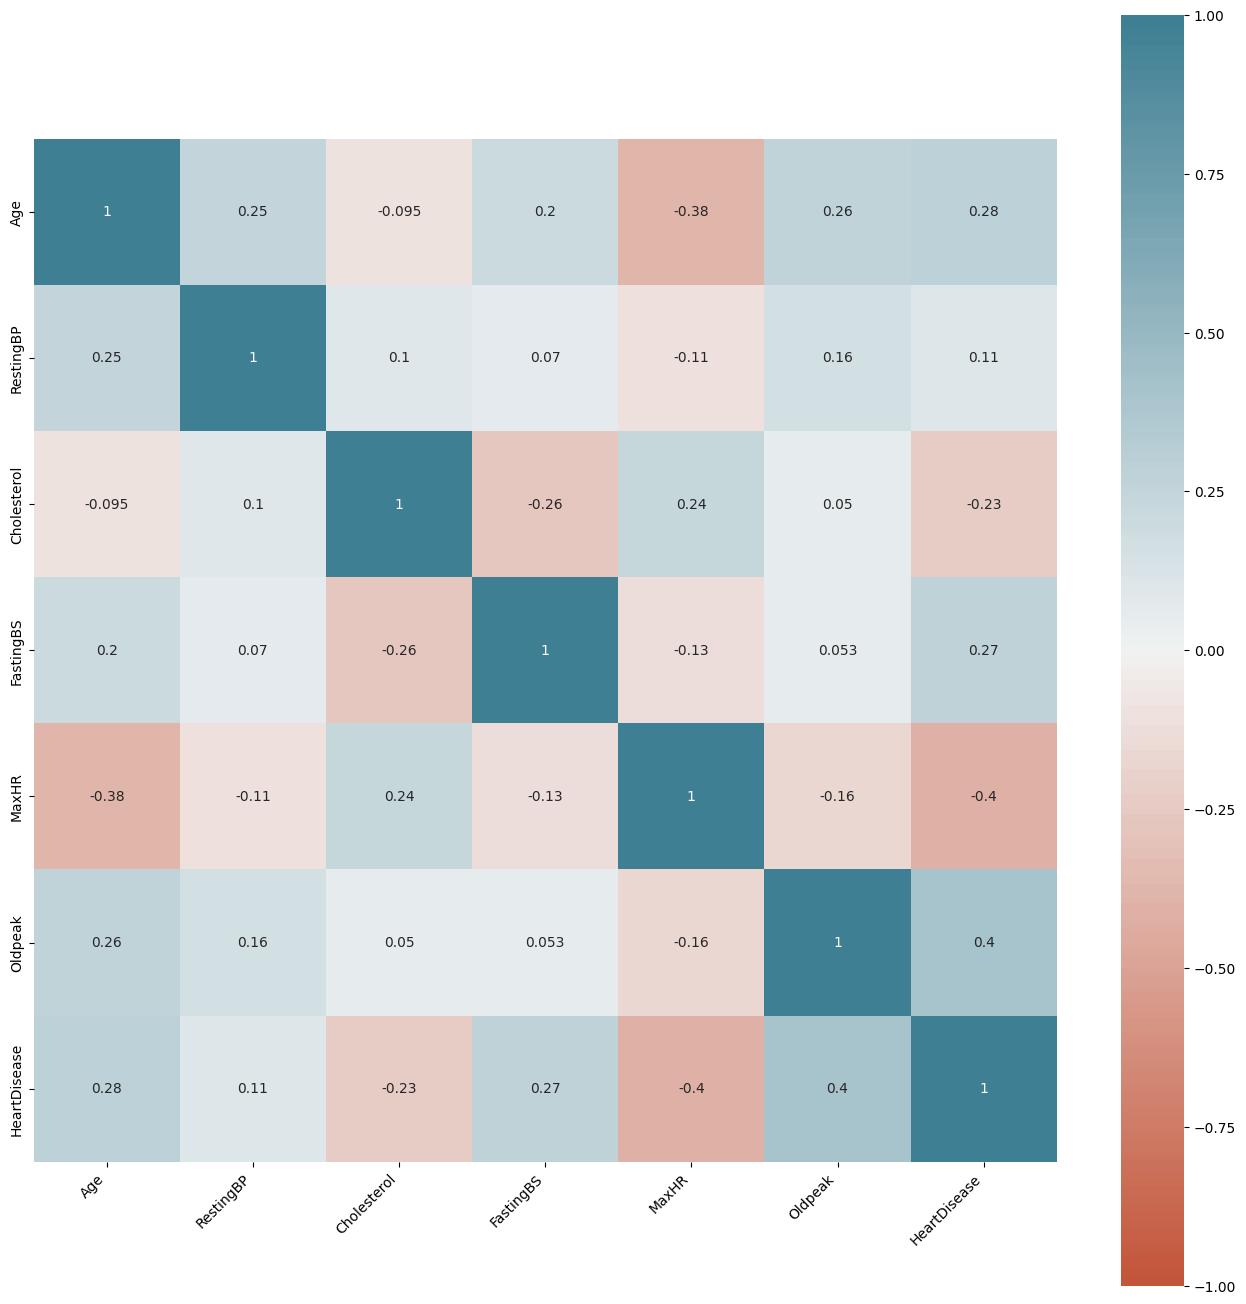

In [ ]:
#plot correlation matrix(heat map)
plt.figure(figsize=(16.5, 16.5))
corr = dataset.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()
#see the correlation between variables

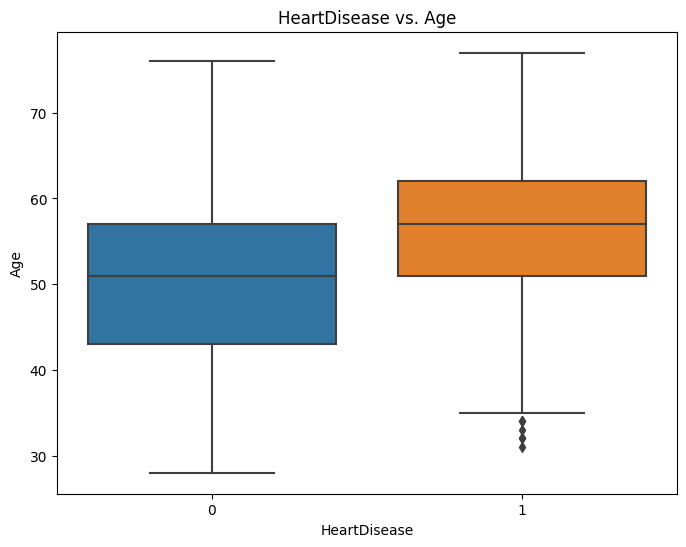

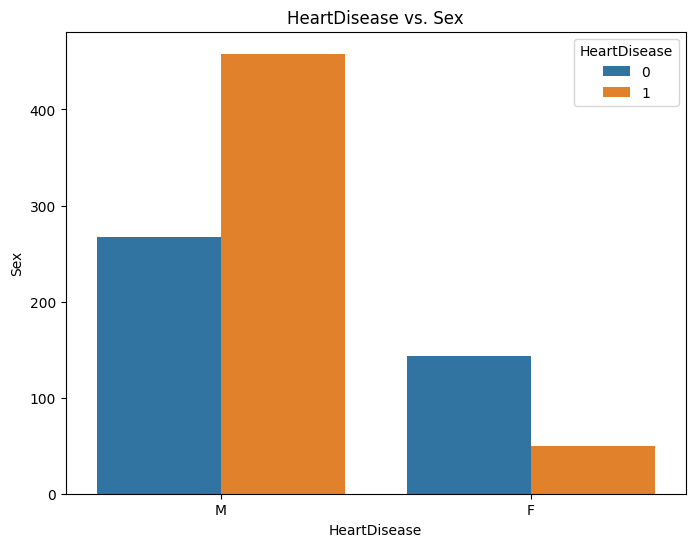

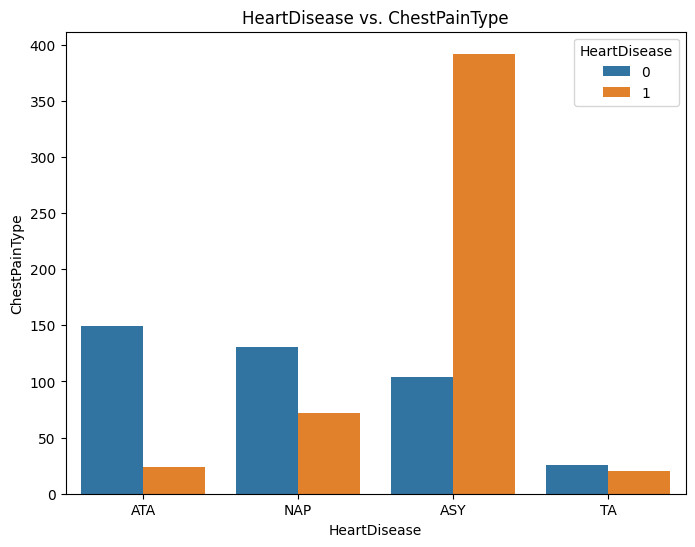

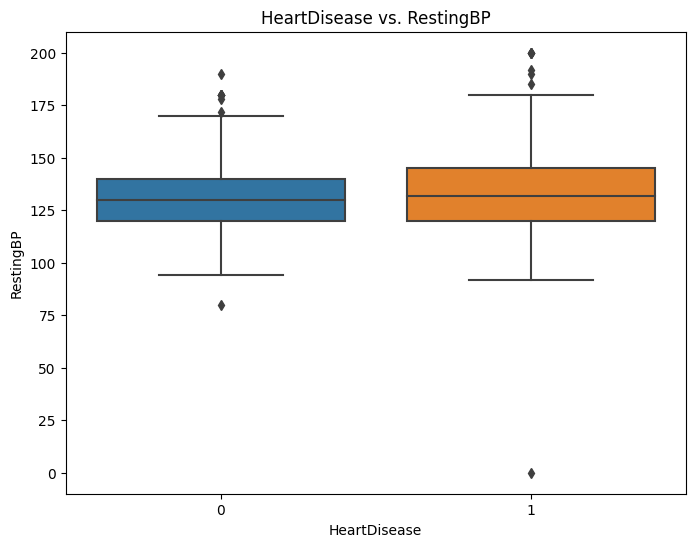

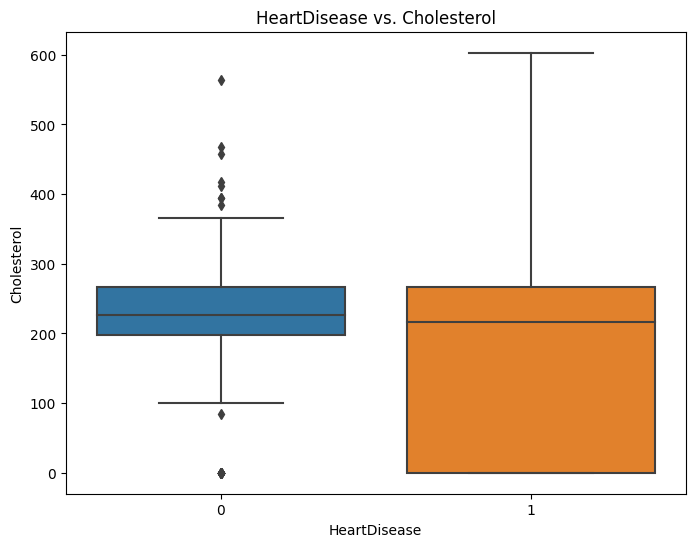

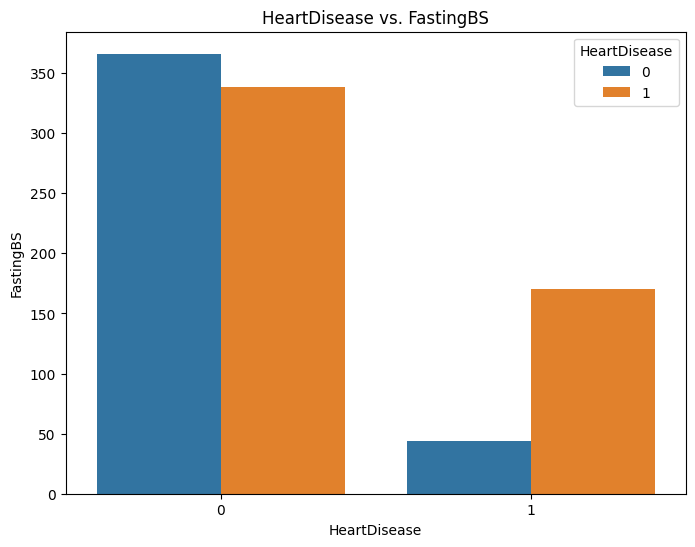

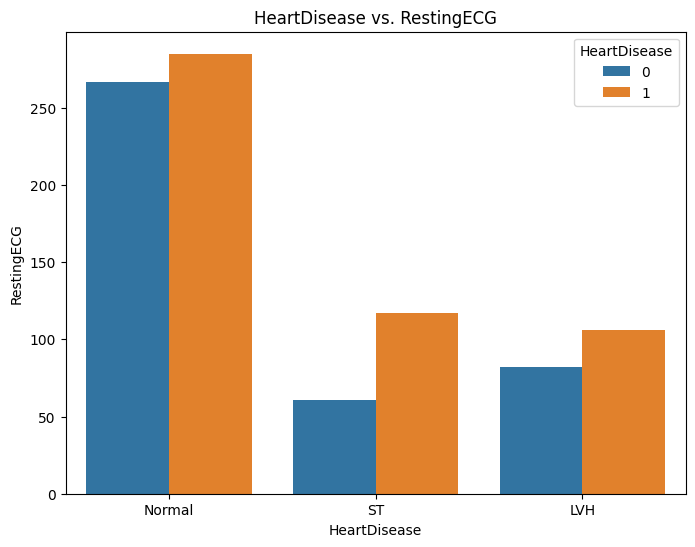

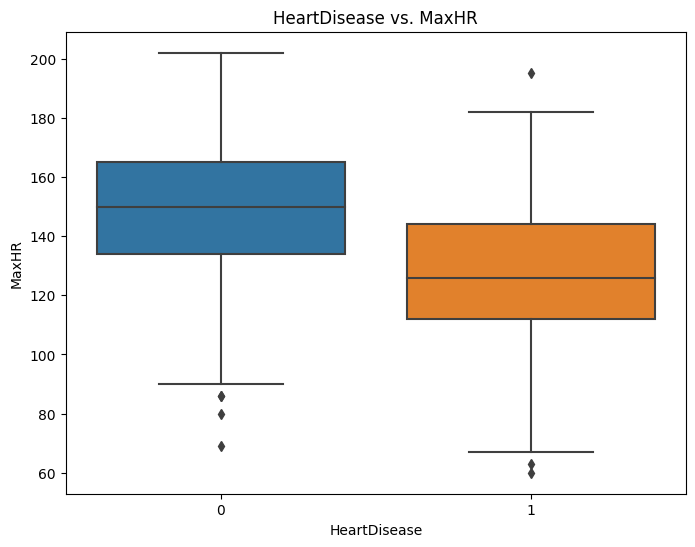

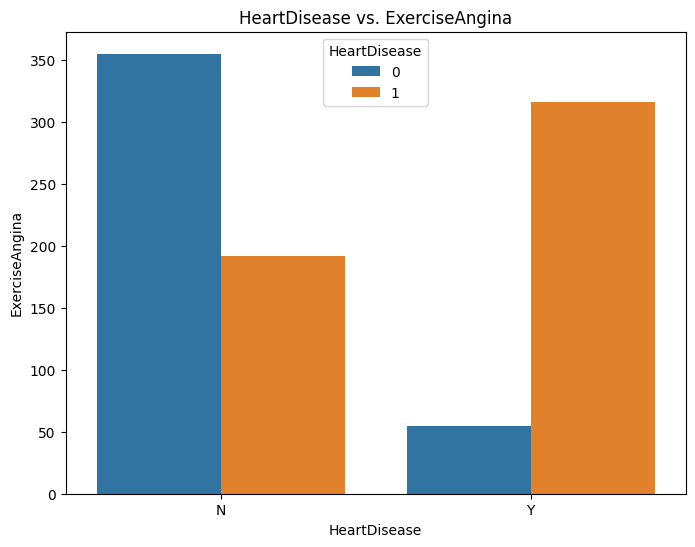

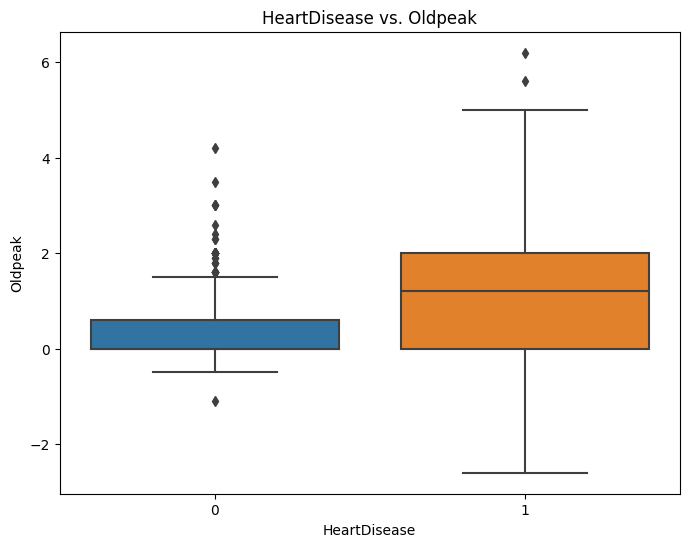

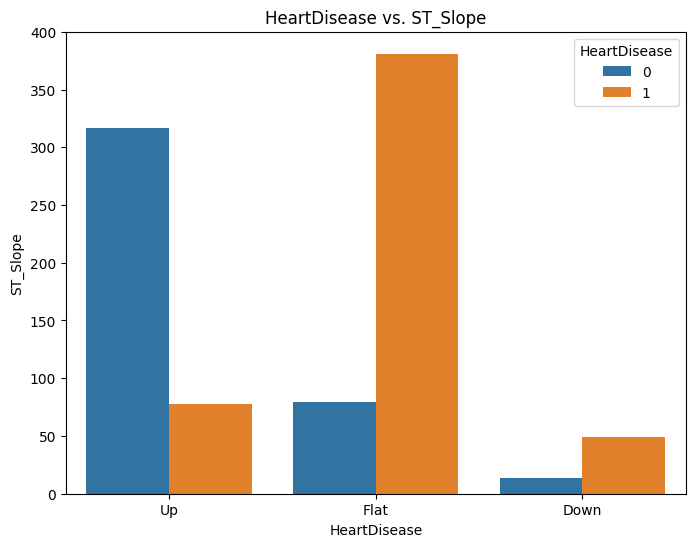

In [ ]:
#plot the target variable with all features (categorical and numerical)
dataset['FastingBS'] = dataset['FastingBS'].astype(str)
# Identify the target variable and independent features
target_variable = 'HeartDisease'
independent_features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
                        'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Plot the target variable against each independent feature
for feature in independent_features:
    plt.figure(figsize=(8, 6))

    if dataset[feature].dtype == 'object':
        sns.countplot(x=feature, hue=target_variable, data=dataset)
    else:
        sns.boxplot(x=target_variable, y=feature, data=dataset)

    plt.xlabel(target_variable)
    plt.ylabel(feature)
    plt.title(f'{target_variable} vs. {feature}')
    plt.show()


#Feature Engineering

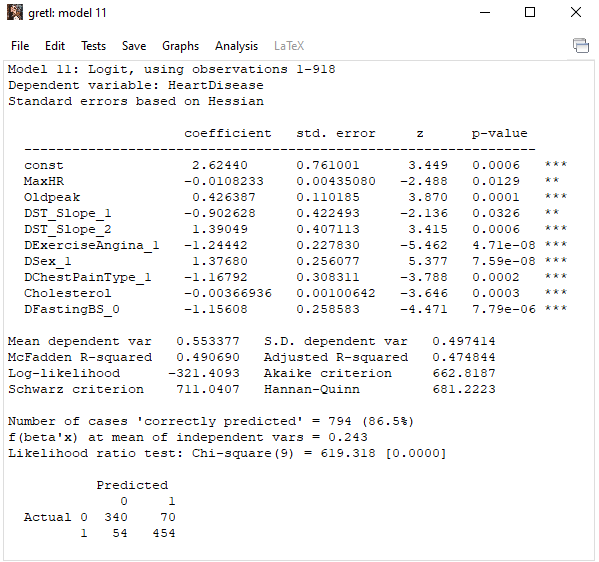

In [ ]:
#after performing feature engineering using Gretle,, the following are the dominant features on the target:
#MaxHR, Oldpeak, DST_Slope, DExerciseAngina,Sex, DChestPainType, Cholesterol, FastingBS

In [ ]:
#Drop undeed columns and detrmine X,y
dataset.drop(columns=['Age', 'RestingECG','RestingBP'], inplace=True)
X=dataset.drop("HeartDisease",axis=1)
y=dataset['HeartDisease']

In [ ]:
X

,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,M,ATA,289,0,172,N,0.0,Up
1,F,NAP,180,0,156,N,1.0,Flat
2,M,ATA,283,0,98,N,0.0,Up
3,F,ASY,214,0,108,Y,1.5,Flat
4,M,NAP,195,0,122,N,0.0,Up
...,...,...,...,...,...,...,...,...
913,M,TA,264,0,132,N,1.2,Flat
914,M,ASY,193,1,141,N,3.4,Flat
915,M,ASY,131,0,115,Y,1.2,Flat
916,F,ATA,236,0,174,N,0.0,Flat


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
#one hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,5,7])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

array([[  0. ,   1. ,   1. , ...,   0. , 157. ,   2. ],
       [  0. ,   1. ,   1. , ...,   0. , 113. ,   1.5],
       [  1. ,   0. ,   0. , ..., 360. , 151. ,   0.8],
       ...,
       [  1. ,   0. ,   0. , ..., 303. , 159. ,   0. ],
       [  0. ,   1. ,   1. , ..., 273. , 102. ,   4. ],
       [  0. ,   1. ,   1. , ..., 243. , 152. ,   0. ]])

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train[:,-3:-1] = sc.fit_transform(X_train[:,-3:-1])
X_test[:,-3:-1] = sc.transform(X_test[:,-3:-1])


In [ ]:
X_train

array([[ 0.        ,  1.        ,  1.        , ..., -1.83603203,
         0.77877513,  2.        ],
       [ 0.        ,  1.        ,  1.        , ..., -1.83603203,
        -0.87875233,  1.5       ],
       [ 1.        ,  0.        ,  0.        , ...,  1.50073861,
         0.55274866,  0.8       ],
       ...,
       [ 1.        , -1.        , -1.        , ..., -1.82676323,
        -5.09791313, -1.        ],
       [-1.        ,  1.        ,  1.        , ..., -1.84530084,
        -5.17325529,  1.        ],
       [ 0.        ,  1.        ,  1.        , ...,  0.41628815,
         0.59041974,  0.        ]])

*********************************************************************************************************
Logistic Regression  accuracy = 0.842391304347826



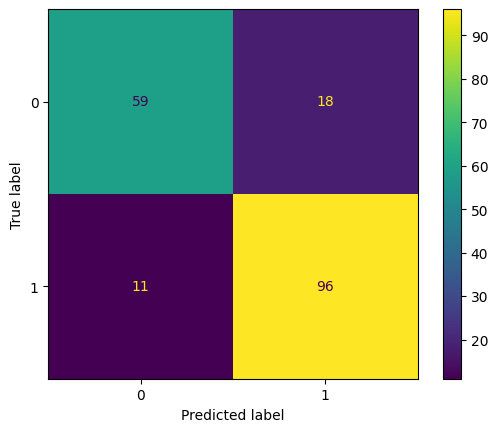

*********************************************************************************************************
Decision Tree  accuracy = 0.7880434782608695



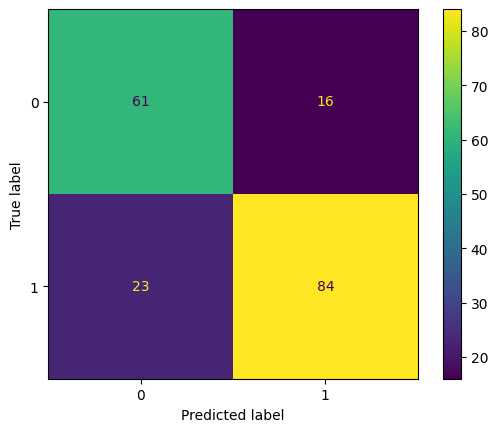

*********************************************************************************************************
Random Forest  accuracy = 0.8478260869565217



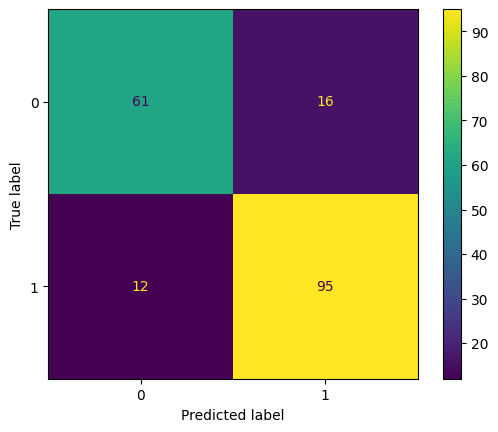

*********************************************************************************************************
K-NN  accuracy = 0.8206521739130435



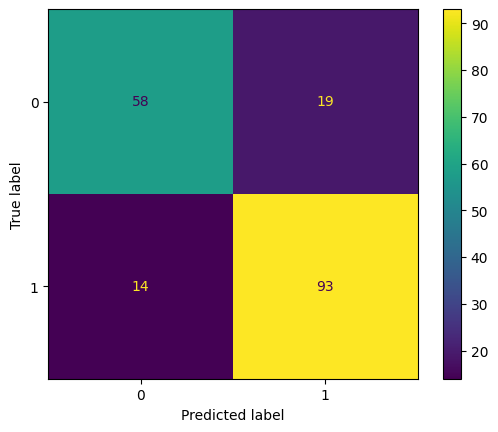

*********************************************************************************************************
SVC (Poly Kernel)  accuracy = 0.8369565217391305



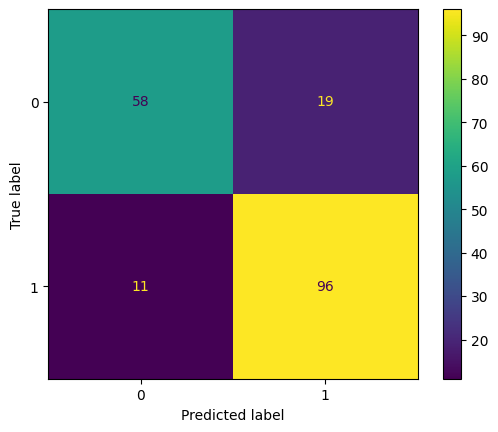

*********************************************************************************************************
SVC (RBF Kernel)  accuracy = 0.8586956521739131



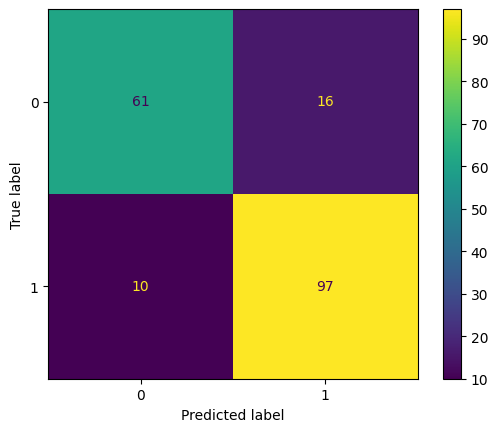

*********************************************************************************************************
Naive Bayes  accuracy = 0.7554347826086957



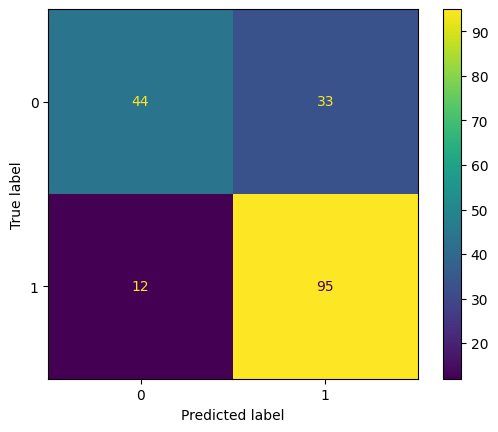

In [ ]:
# Define the Classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0),
    'K-NN': KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2),
    'SVC (Poly Kernel)': SVC(kernel='poly', degree=4, random_state=0),
    'SVC (RBF Kernel)': SVC(kernel='rbf', random_state=0),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate the models
for model_name, model in models.items():
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Predict X_test
    y_pred = model.predict(X_test)

    # Calculate accuracy on the X_test1 set
    accuracy_test = accuracy_score(y_test, y_pred)
    print('*********************************************************************************************************')
    print(f"{model_name}  accuracy = {accuracy_test}\n")
     # Compute and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()